In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [4]:
def load_data(filepath):
    data = pd.read_csv(filepath)
    data = data.dropna()
    return data

data = load_data("/home/huy/projects/DA/london_weather.csv")

In [5]:
X = data.drop(columns=["date", "mean_temp"])
y = data["mean_temp"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [9]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 0.69
MSE: 0.79
RMSE: 0.89


In [10]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

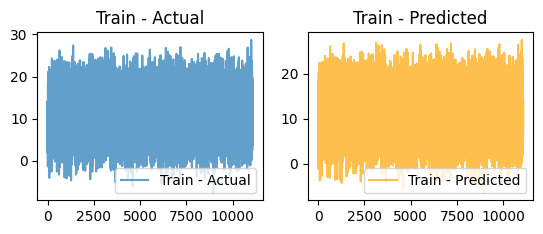

In [24]:
plt.subplot(2, 2, 1)
plt.plot(range(len(y_train)), y_train, label="Train - Actual", alpha=0.7)
plt.title("Train - Actual")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(len(y_train)), y_pred_train, label="Train - Predicted", color='orange', alpha=0.7)
plt.title("Train - Predicted")
plt.legend()

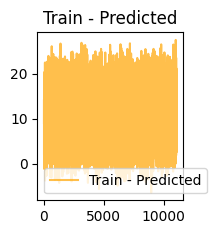

In [21]:
plt.subplot(2, 2, 1)
plt.plot(range(len(y_test)), y_test.values, label="Test - Actual", alpha=0.7)
plt.title("Test - Actual")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(len(y_test)), y_pred_test, label="Test - Predicted",color='orange', alpha=0.7)
plt.title("Test - Predicted")
plt.legend()

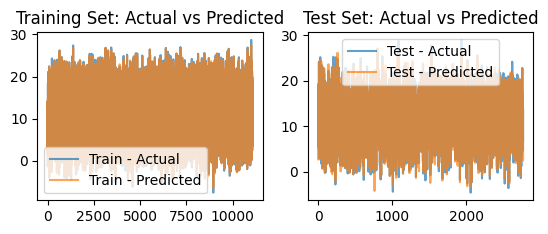

In [25]:
plt.subplot(2, 2, 1)
plt.plot(range(len(y_train)), y_train, label="Train - Actual", alpha=0.7)
plt.plot(range(len(y_train)), y_pred_train, label="Train - Predicted", alpha=0.7)
plt.title("Training Set: Actual vs Predicted")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(len(y_test)), y_test.values, label="Test - Actual", alpha=0.7)
plt.plot(range(len(y_test)), y_pred_test, label="Test - Predicted", alpha=0.7)
plt.title("Test Set: Actual vs Predicted")
plt.legend()

Text(0, 0.5, 'Frequency')

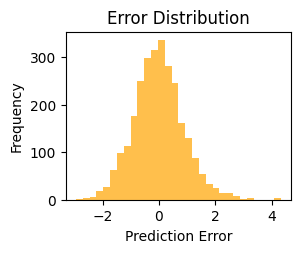

In [20]:
errors = y_test - y_pred_test
plt.subplot(2, 2, 3)
plt.hist(errors, bins=30, alpha=0.7, color="orange")
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")

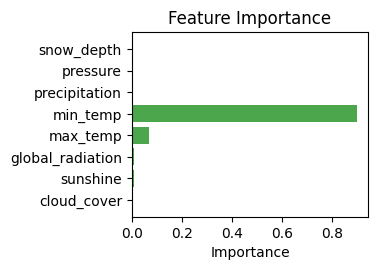

In [21]:
plt.subplot(2, 2, 4)
feature_importance = model.feature_importances_
plt.barh(X.columns, feature_importance, color="green", alpha=0.7)
plt.title("Feature Importance")
plt.xlabel("Importance")

plt.tight_layout()
plt.show()